# Números escrito a mão

### **Carregando a base de dados - Dígitos**

In [6]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The Digits dataset
digits = datasets.load_digits()

### Descrição sobre a base de dados

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [9]:
list(zip(digits.images))

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0.,  0.,  1.

### Visualizando os valores de classes**

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando as imagens e classes

In [11]:
images_and_labels = list(zip(digits.images,digits.target))

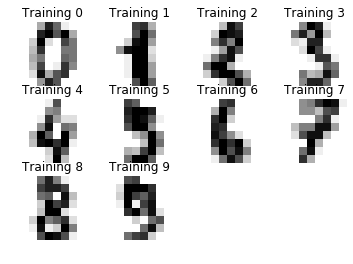

In [12]:
for index, (imagem, labels) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(imagem, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training %i' % labels)

### Convertendo os dados em DataFrame

In [13]:
import pandas as pd

In [14]:
type(digits.images)

numpy.ndarray

In [15]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [16]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [17]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  

### Dividindo os dados em treino e teste

In [19]:
X_train, X_teste, y_train, y_test = train_test_split(dataset.drop('classe', axis=1), dataset['classe'], test_size=0.3)

**Verificando a forma dos Dados**

In [20]:
X_train.shape, X_teste.shape

((1257, 64), (540, 64))

In [21]:
y_train.shape, y_test.shape

((1257,), (540,))

**Instânciando o algoritmo KNN**

**p=2 |
metric='minkowski'** -> Esses dois parâmetros faz com que a metrica do calculo de distância seja a EUCLIDIANA

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

**Treinando o Algoritmo**

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

**Predizendo Novos Pontos**

In [24]:
resultado = knn.predict(X_teste)

# Técnicas de Validação

## Metricas de Classificação

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        51
           3       0.96      1.00      0.98        52
           4       1.00      0.97      0.98        61
           5       0.98      0.98      0.98        54
           6       0.98      1.00      0.99        51
           7       0.96      1.00      0.98        43
           8       0.96      0.98      0.97        47
           9       1.00      0.93      0.96        69

   micro avg       0.98      0.98      0.98       540
   macro avg       0.98      0.99      0.98       540
weighted avg       0.98      0.98      0.98       540



**Matriz de Confusão**

In [26]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'],margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        57   0   0   0   0   0   0   0   0   0   57
1         0  55   0   0   0   0   0   0   0   0   55
2         0   0  51   0   0   0   0   0   0   0   51
3         0   0   0  52   0   0   0   0   0   0   52
4         0   0   0   0  59   0   0   1   1   0   61
5         0   0   0   0   0  53   1   0   0   0   54
6         0   0   0   0   0   0  51   0   0   0   51
7         0   0   0   0   0   0   0  43   0   0   43
8         0   1   0   0   0   0   0   0  46   0   47
9         0   0   0   2   0   1   0   1   1  64   69
All      57  56  51  54  59  54  52  45  48  64  540


**Cross Validation**

Faz o Teste do Algoritmo várias vezes verificando se ele está consistente

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
scores

array([0.95604396, 0.95856354, 0.96657382, 0.98319328, 0.96619718])

# Otimizando o Parâmetro K

### Importando o GridSeach

In [28]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parâmetro

In [29]:
k_list = list(range(1,31))

In [30]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciando o objeto GridSeach

In [31]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Treinando o Objeto

In [32]:
grid.fit(dataset.drop('classe', axis=1), dataset['classe'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Visualizando os valores de scores

In [33]:
grid.cv_results_.get('mean_test_score')

array([0.96494157, 0.96661102, 0.96605454, 0.9638286 , 0.96271564,
       0.95937674, 0.95993322, 0.95770729, 0.95603784, 0.95492487,
       0.95548136, 0.95603784, 0.95548136, 0.95603784, 0.95436839,
       0.95436839, 0.95325543, 0.94880356, 0.95158598, 0.95047301,
       0.94880356, 0.94991653, 0.94824708, 0.94936004, 0.94602115,
       0.94546466, 0.94490818, 0.94268225, 0.94045632, 0.94045632])

In [34]:
print(f"O melhor valor de K = {grid.best_params_} com o valor {grid.best_score_} de acurácia")

O melhor valor de K = {'n_neighbors': 2} com o valor 0.9666110183639399 de acurácia


In [35]:
grid.cv_results_.get('mean_test_score')

array([0.96494157, 0.96661102, 0.96605454, 0.9638286 , 0.96271564,
       0.95937674, 0.95993322, 0.95770729, 0.95603784, 0.95492487,
       0.95548136, 0.95603784, 0.95548136, 0.95603784, 0.95436839,
       0.95436839, 0.95325543, 0.94880356, 0.95158598, 0.95047301,
       0.94880356, 0.94991653, 0.94824708, 0.94936004, 0.94602115,
       0.94546466, 0.94490818, 0.94268225, 0.94045632, 0.94045632])

### Visualização dos valores de K e acurácia

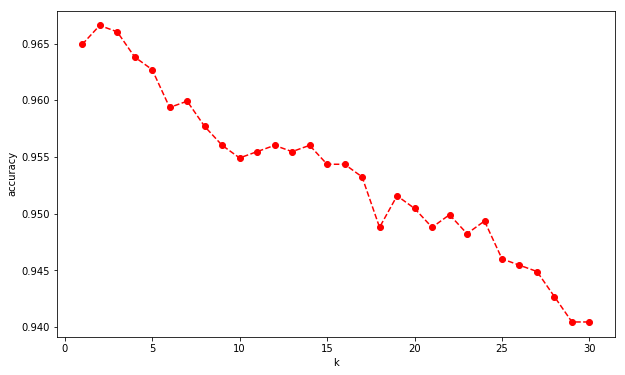

In [36]:
scores = []
for score in grid.cv_results_.get('mean_test_score'):
    scores.append(score)
plt.figure(figsize=(10,6))
plt.plot(k_list, scores, color='red', linestyle='dashed', marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## Considerações Finais

**KNeighborsClassifier**

**n_neighbors** -> Parâmetro Básico para contagem de Vizinhos 

**Weights** -> Função para Calibração 

**Algoritmo
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html